In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy import stats

total_agents	60
number_of_cues	2
informed_group_size	30
num_replicates	500
num_timesteps	10000
time step_inc	0.1
angular_error_sd	0.0
max_turning_rate	2
speed	1.0
angular_thresh	0.3490658503988659
set_omega	0.3
omega_inc	0.012
omega_dec	0.0008
omega_max	0.4
max_angle	1.0471975511965976



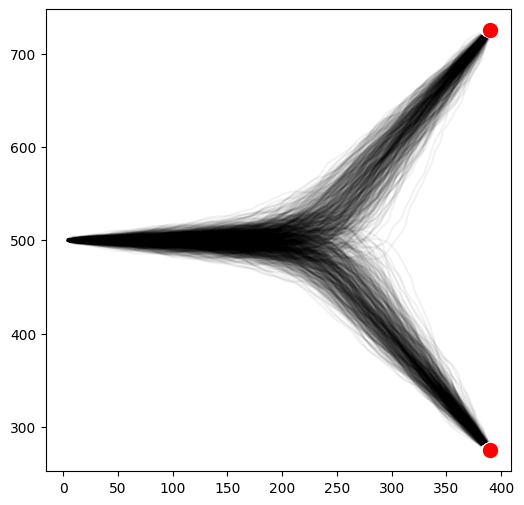

In [2]:
fig, ax = plt.subplots(figsize=(6,6))

# display parameters
text_file = open("../output/reproduce/parameters_2_targets_500rep.txt")
file_content = text_file.read()
print(file_content)
text_file.close()
'''
df_cen = pd.read_csv('../output/reproduce/centroid_2_targets_500rep.txt', sep='\t')
df_tar = pd.read_csv('../output/reproduce/targets_2_targets_500rep.txt', sep='\t')
'''
df_cen = pd.read_csv('../output/beta/centroid_40deg_20b_1000rep.txt', sep='\t')
df_tar = pd.read_csv('../output/beta/targets_40deg_20b_1000rep.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.05)
ax.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100);
#ax.set_title("With feedback", fontsize=20);

In [3]:
# find the replicates that reach one or the other target and split them
repl0 = df_cen[df_cen['cue_reached']==0].replicate
repl1 = df_cen[df_cen['cue_reached']==1].replicate

traj0 = df_cen[df_cen.replicate.isin(repl0)]
traj1 = df_cen[df_cen.replicate.isin(repl1)]

---
---
---

## Find bifurcation point as the splitting between two gaussians

In [4]:
# find the replicates that reach one or the other target and split them
repl0 = df_cen[df_cen['cue_reached']==0].replicate
repl1 = df_cen[df_cen['cue_reached']==1].replicate

traj0 = df_cen[df_cen.replicate.isin(repl0)]
traj1 = df_cen[df_cen.replicate.isin(repl1)]
#print(traj0.head(90), traj1.head(90))

### Plot the distribution of the **y coordinates** at time 0 for the two subgroups

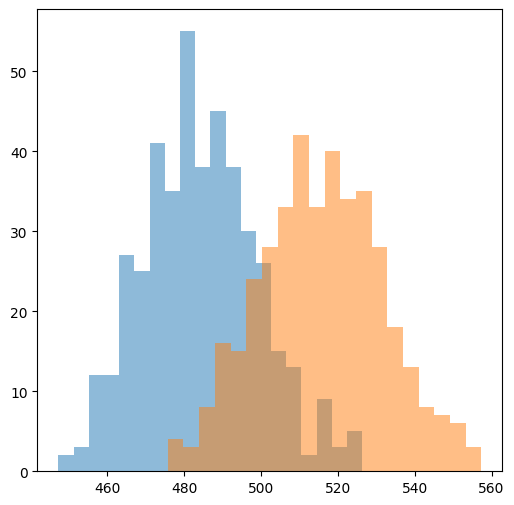

In [5]:
time = 2500

fig, ax = plt.subplots(figsize=(6,6))
plt.hist(traj0[traj0.time==time].y.to_numpy(), 20, alpha=0.5)
plt.hist(traj1[traj1.time==time].y.to_numpy(), 20, alpha=0.5);

Gaussian fit

Kolmogorov–Smirnov test
traj0:  KstestResult(statistic=0.03711003131517704, pvalue=0.5725108710269122)
traj1:  KstestResult(statistic=0.03711003131517704, pvalue=0.5725108710269122)


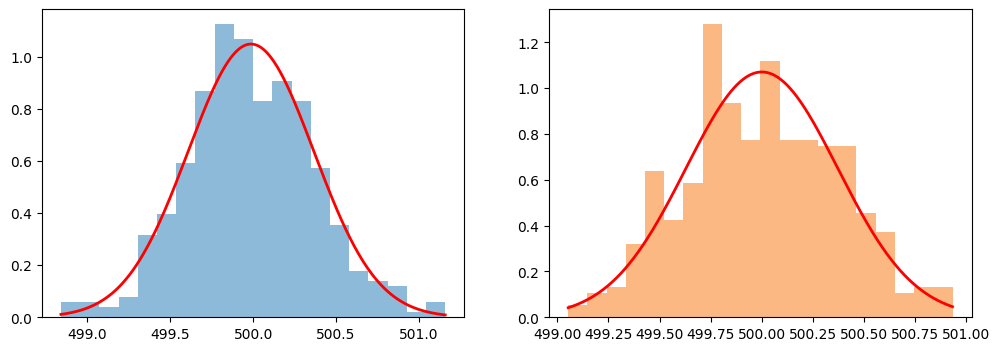

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
x0 = np.linspace(traj0[traj0.time==0].y.min(), traj0[traj0.time==0].y.max(), 1000)
x1 = np.linspace(traj1[traj1.time==0].y.min(), traj1[traj1.time==0].y.max(), 1000)

#Gaussian fit
mean0, sigma0 = stats.norm.fit(traj0[traj0.time==0].y.to_numpy())
#print('sigma 0: ', sigma0)
Gauss0 = stats.norm(mean0, sigma0)
ax1.plot(x0, Gauss0.pdf(x0), color="red", lw=2, label="Gauss")
ax1.hist(traj0[traj0.time==0].y.to_numpy(), 20, alpha=0.5, density=True)

mean1, sigma1 = stats.norm.fit(traj1[traj1.time==0].y.to_numpy())
#print('sigma 1: ', sigma1)
Gauss1 = stats.norm(mean1, sigma1)
ax2.plot(x1, Gauss1.pdf(x1), color="red", lw=2, label="Gauss")
ax2.hist(traj1[traj1.time==0].y.to_numpy(), 20, alpha=0.5, density=True, color='#f97306')

print("Kolmogorov–Smirnov test")
print("traj0: ", stats.kstest(traj0[traj0.time==0].y.to_numpy(), lambda x: Gauss0.cdf(x)))
print("traj1: ", stats.kstest(traj0[traj0.time==0].y.to_numpy(), lambda x: Gauss0.cdf(x)))

**It is reasonable to think that the distribution is a gaussian**

In [7]:
#from statsmodels.stats.weightstats import ztest as ztest

diff = []

for i in range(traj0.time.max()):
    mean1, sigma1 = stats.norm.fit(traj0[traj0.time==i*50].y.to_numpy())
    mean2, sigma2 = stats.norm.fit(traj1[traj1.time==i*50].y.to_numpy())
    #z, p = ztest(traj0[traj0.time==i*50].y.to_numpy(), traj1[traj1.time==i*50].y.to_numpy())
    if (abs(mean1 - mean2) > (sigma1+sigma2)):
        x_bif0 = traj0[traj0.time==i*50].x.mean()
        x_bif1 = traj1[traj1.time==i*50].x.mean()
        print('time:', 50*i)
        print('x:', (x_bif0+x_bif1)/2)
        break
    diff.append(abs(mean1 - mean2))
    #print(z, p)

time: 2500
x: 224.89963564235018


/home/eleonora/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


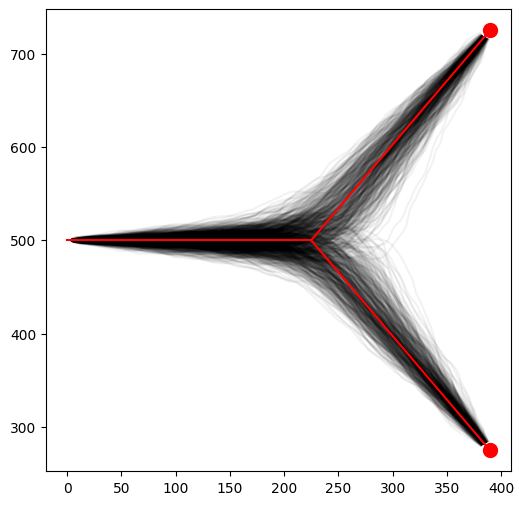

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

#df_cen = pd.read_csv('../output/beta/centroid_40deg_20b_1000rep.txt', sep='\t')
#df_tar = pd.read_csv('../output/beta/targets_40deg_20b_1000rep.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.05)
#plt.vlines((x_bif0+x_bif1)/2, 300, 700, color='r')
ax.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)


ax.plot([0,(x_bif0+x_bif1)/2],[500,500], color='r')
ax.plot([(x_bif0+x_bif1)/2, df_tar.loc[df_tar.id==0,:].x],[500, df_tar.loc[df_tar.id==0,:].y], color='r')
ax.plot([(x_bif0+x_bif1)/2, df_tar.loc[df_tar.id==1,:].x],[500, df_tar.loc[df_tar.id==1,:].y], color='r');
#ax.set_title("With feedback", fontsize=20);